In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv(r'F:\sourav\Datasets\titanic-data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Filling null values in Age column

In [7]:
m=df['Age'].mean()
df['Age']=df['Age'].fillna(m)

In [8]:
df['Age'].isnull().sum()

0

### Filling null values in Embarked column

In [9]:
mod=df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(mod)

### Created Family column by Combining siblings spouse(SibSp) and Parent and Children(Parch)

In [10]:
df['Family']=df['SibSp']+df['Parch']

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Dropping siblings spouse(SibSp) and Parent and Children(Parch) columns From Dataset

In [12]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    object 
 10  Family       891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### counting values of Geneder

In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### counting values of Passenger Class

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### counting values of Survived people

In [16]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### counting values of Particular Age Group

In [17]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

### counting values of Ticket

In [18]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### counting values of Embarked

In [19]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Histogram of Age using Seaborn

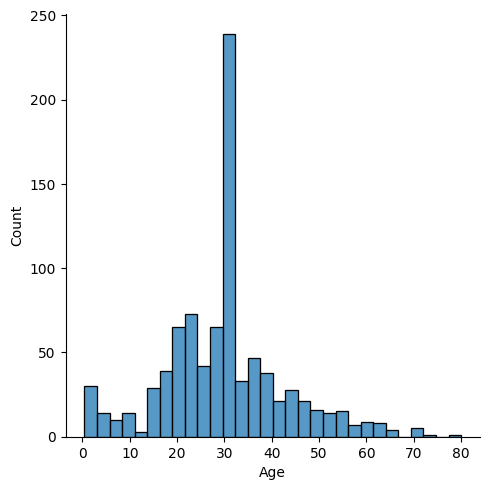

In [20]:
sb.displot(df['Age'])

### Histogram of Fare

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

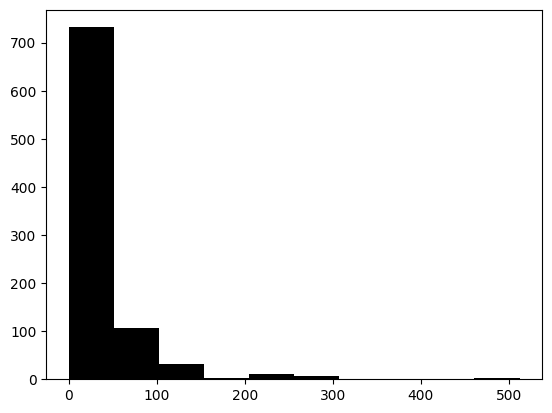

In [21]:
plt.hist(df['Fare'],color='black')

### Histogram of Family

(array([537., 161., 102.,  29.,  15.,  22.,  12.,   6.,   0.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

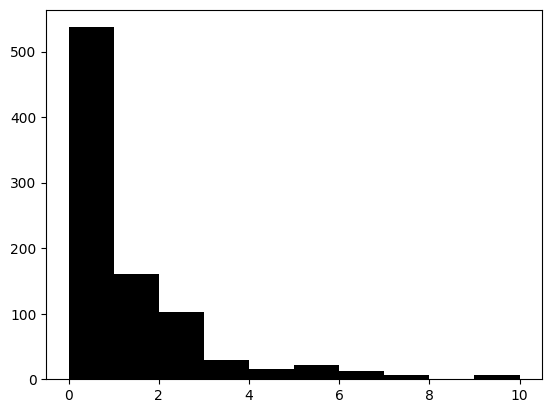

In [22]:
plt.hist(df['Family'],color='black')

### Comparison between Gender and Survived 

<AxesSubplot: xlabel='Sex', ylabel='count'>

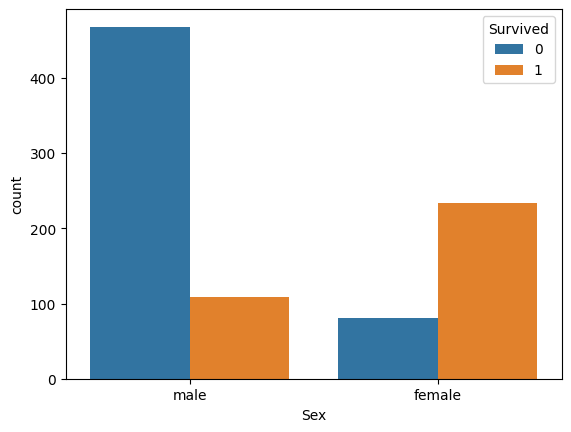

In [23]:
sb.countplot(data=df,x='Sex',hue='Survived')

### Comparison between Pclass and Survived 

<AxesSubplot: xlabel='Pclass', ylabel='count'>

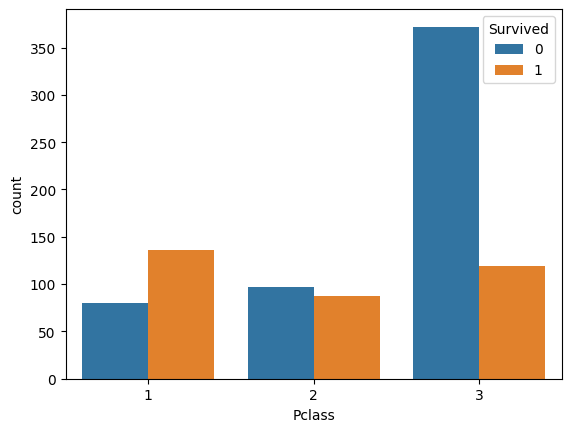

In [24]:
sb.countplot(data=df,x='Pclass',hue='Survived')

### Comparison between Age and Survived 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, '0.42'),
  Text(1, 0, '0.67'),
  Text(2, 0, '0.75'),
  Text(3, 0, '0.83'),
  Text(4, 0, '0.92'),
  Text(5, 0, '1.0'),
  Text(6, 0, '2.0'),
  Text(7, 0, '3.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '5.0'),
  Text(10, 0, '6.0'),
  Text(11, 0, '7.0'),
  Text(12, 0, '8.0'),
  Text(13, 0, '9.0'),
  Text(14, 0, '10.0'),
  Text(15, 0, '11.0'),
  Text(16, 0, '12.0'),
  Text(17, 0, '13.0'),
  Text(18, 0, '14.0'),
  Text(19, 0, '14.5'),
  Text(20, 0, '15.0'),
  Text(21, 0, '16.0'),
  Text(22, 0, '17.0'),
  Text(23, 0, '18.0'),
  Text(24, 0, '19.0'),
  Text(25, 0, '20.0'),
  Text(26, 0, '

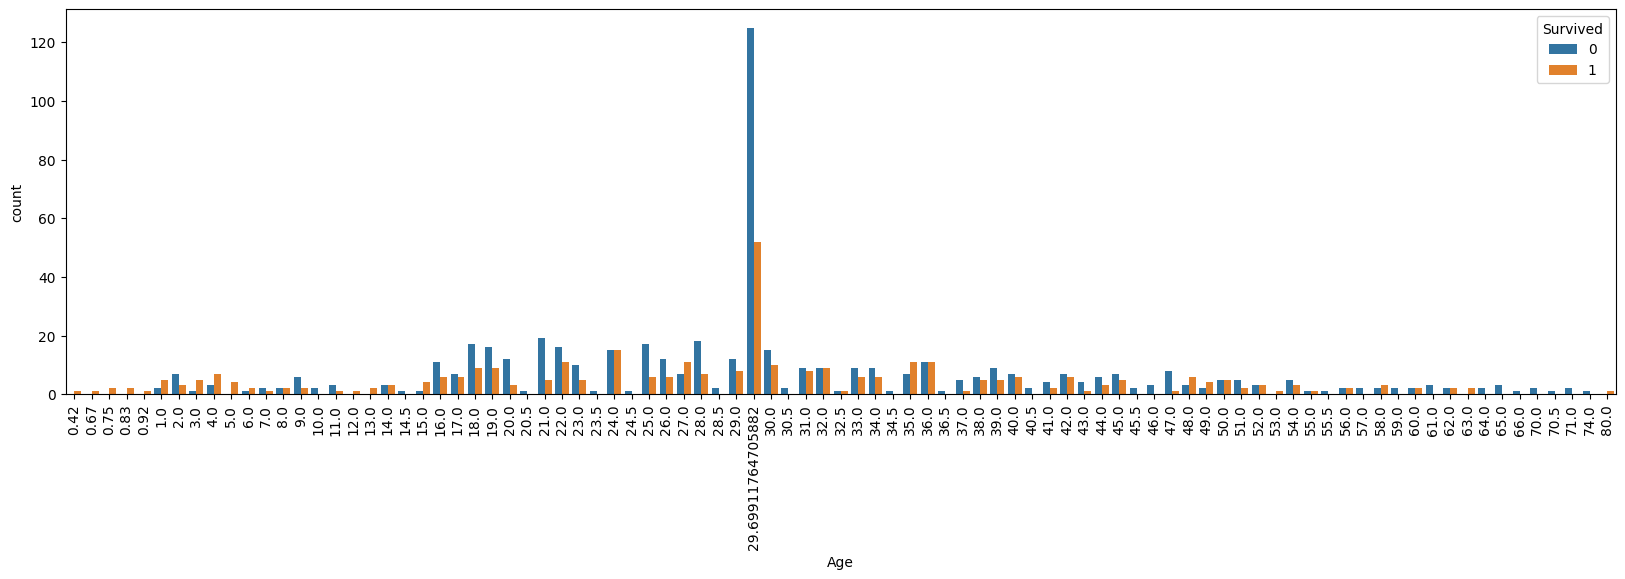

In [43]:
plt.figure(figsize=(20,5))
sb.countplot(data=df,x='Age',hue='Survived')
plt.xticks(rotation=90)

### Comparison between Family and Survived 

<AxesSubplot: xlabel='Family', ylabel='count'>

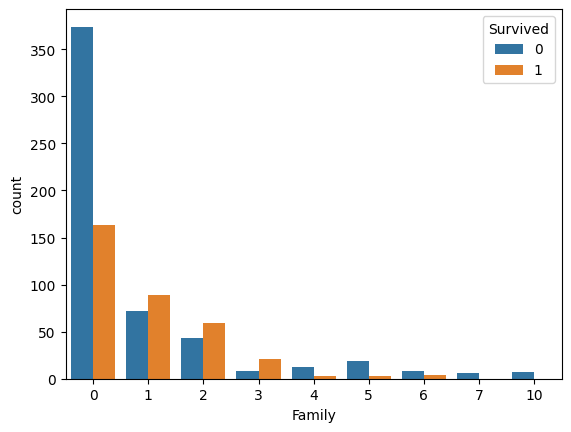

In [26]:
sb.countplot(data=df,x='Family',hue='Survived')

### Comparison between Age and Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, '0.42'),
  Text(1, 0, '0.67'),
  Text(2, 0, '0.75'),
  Text(3, 0, '0.83'),
  Text(4, 0, '0.92'),
  Text(5, 0, '1.0'),
  Text(6, 0, '2.0'),
  Text(7, 0, '3.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '5.0'),
  Text(10, 0, '6.0'),
  Text(11, 0, '7.0'),
  Text(12, 0, '8.0'),
  Text(13, 0, '9.0'),
  Text(14, 0, '10.0'),
  Text(15, 0, '11.0'),
  Text(16, 0, '12.0'),
  Text(17, 0, '13.0'),
  Text(18, 0, '14.0'),
  Text(19, 0, '14.5'),
  Text(20, 0, '15.0'),
  Text(21, 0, '16.0'),
  Text(22, 0, '17.0'),
  Text(23, 0, '18.0'),
  Text(24, 0, '19.0'),
  Text(25, 0, '20.0'),
  Text(26, 0, '

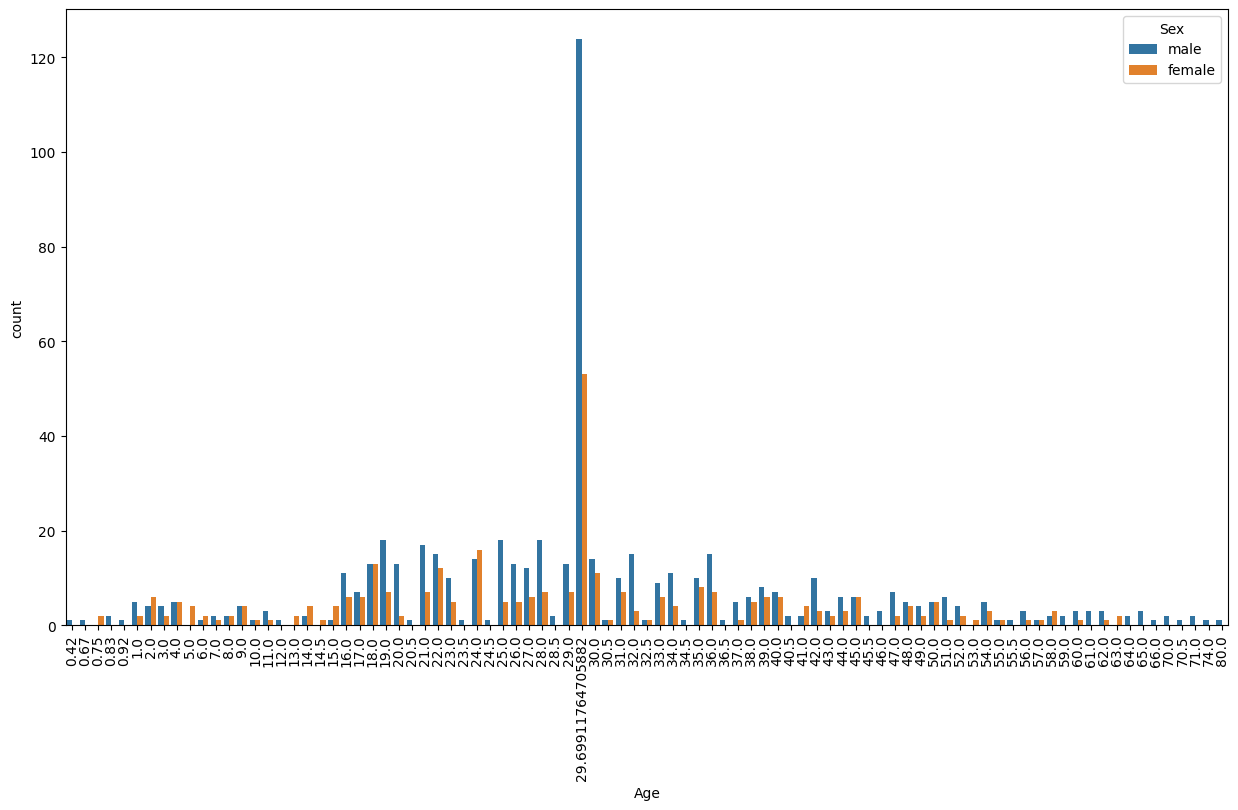

In [33]:
plt.figure(figsize=(15,8))
sb.countplot(data=df,x='Age',hue='Sex')
plt.xticks(rotation=90)

### Comparison between Family and Gender

<AxesSubplot: xlabel='Family', ylabel='count'>

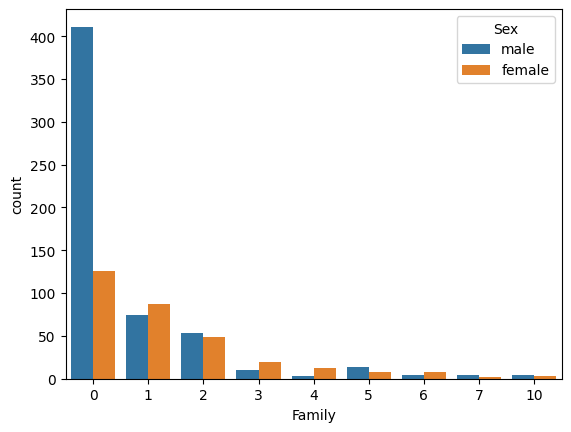

In [39]:
sb.countplot(data=df,x='Family',hue='Sex')

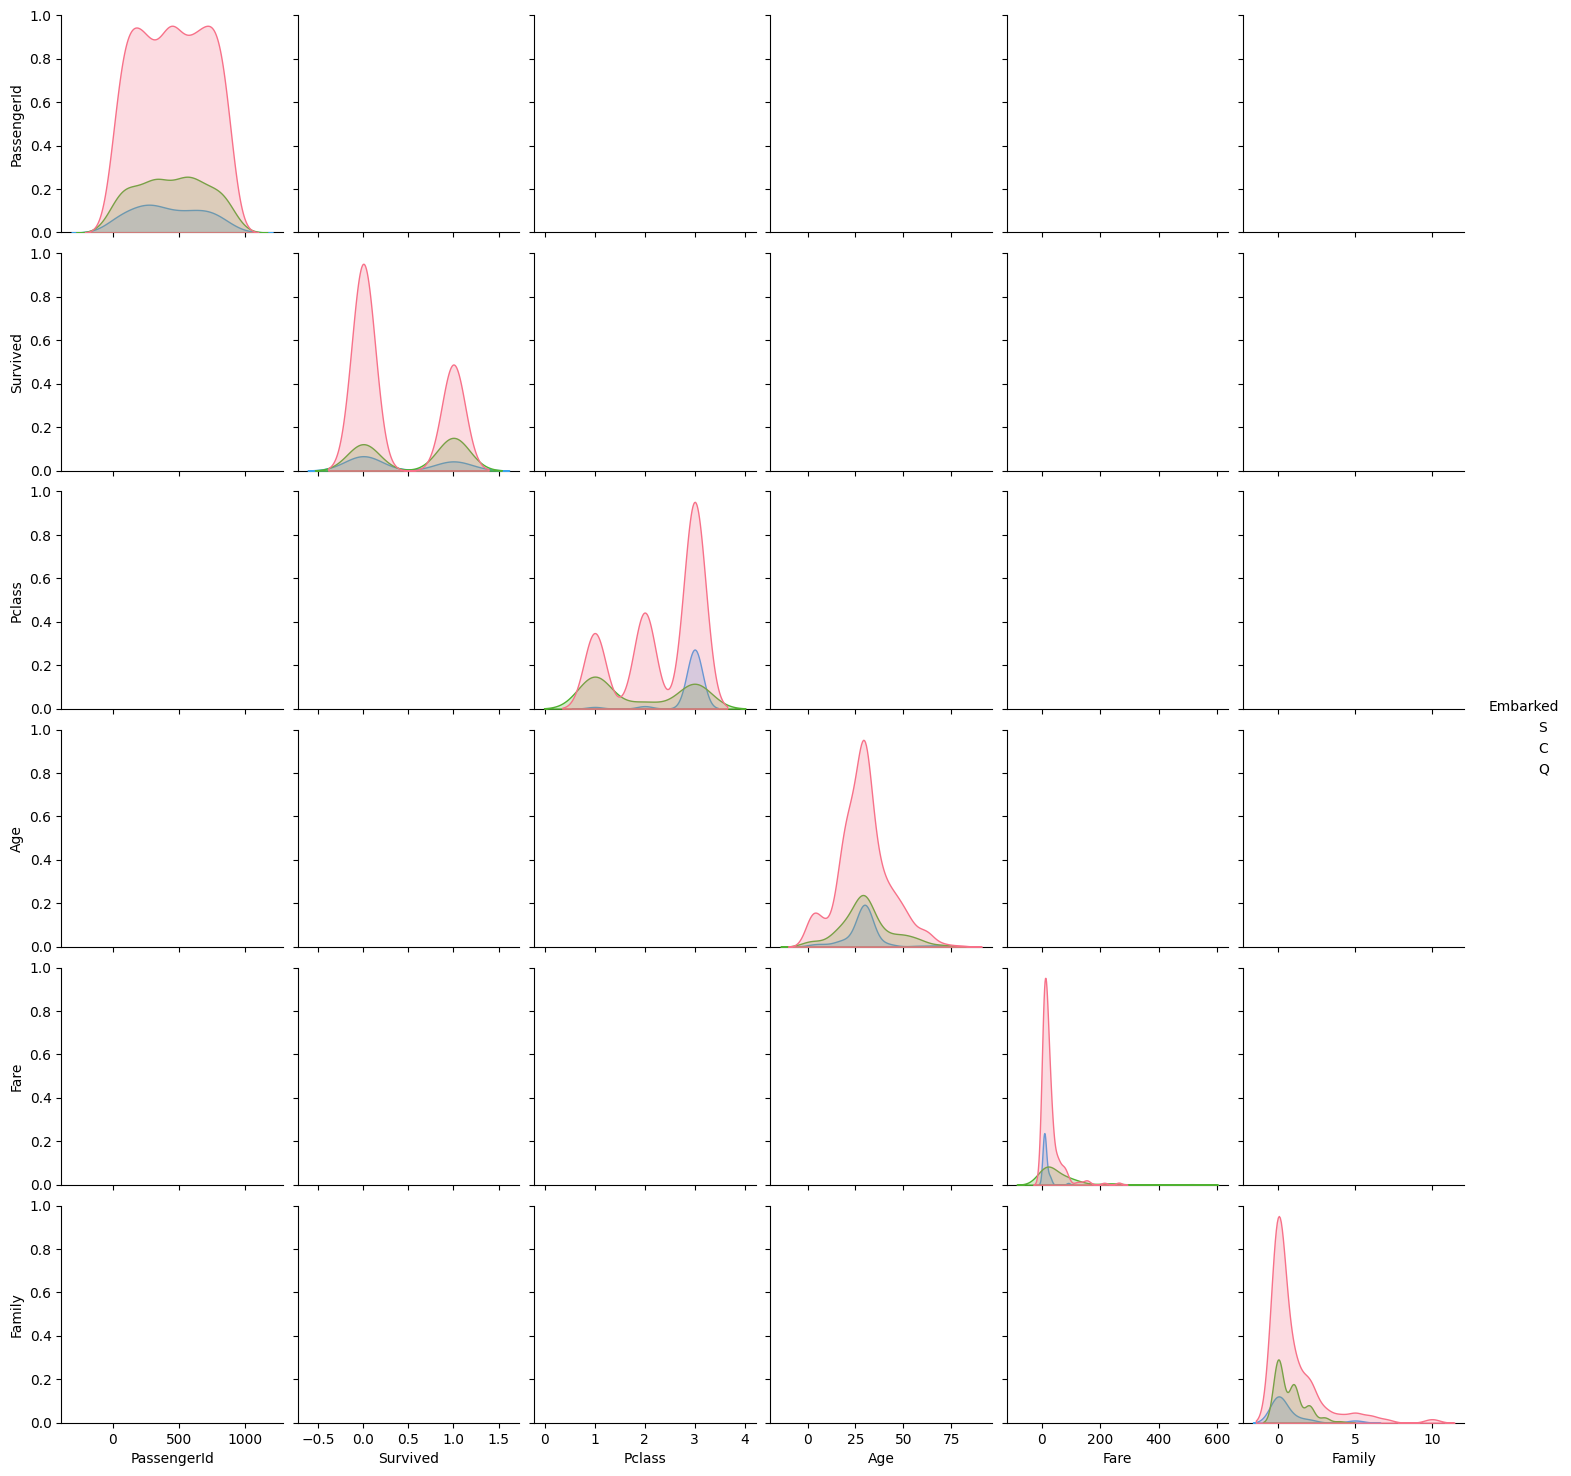

In [47]:
sb.pairplot(data=df,hue='Embarked',kind='Scatter',palette='husl')